<a href="https://colab.research.google.com/github/joseverajim/Actividad-5/blob/main/Actividades/Actividad5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
df = pd.read_csv('tokyostd.csv')
print(df.columns)
print(df.shape)

Index(['id', 'name', 'description', 'neighbourhood_cleansed', 'property_type',
       'room_type', 'amenities', 'first_review', 'last_review', 'host_id',
       'host_name', 'host_since', 'host_response_time', 'host_is_superhost',
       'host_identity_verified', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'latitude', 'longitude',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'rev

In [64]:
# Vista rápida
print(df.shape)
print(df.dtypes)
df.head()

(22783, 50)
id                                              float64
name                                             object
description                                      object
neighbourhood_cleansed                           object
property_type                                    object
room_type                                        object
amenities                                        object
first_review                                     object
last_review                                      object
host_id                                           int64
host_name                                        object
host_since                                       object
host_response_time                               object
host_is_superhost                                object
host_identity_verified                           object
instant_bookable                                 object
calculated_host_listings_count                    int64
calculated_host_listings_count_entir

,id,name,description,neighbourhood_cleansed,property_type,room_type,amenities,first_review,last_review,host_id,...,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,estimated_occupancy_l365d,estimated_revenue_l365d
0,197677.0,Oshiage Holiday Apartment,No Description,Sumida Ku,Entire rental unit,Entire home/apt,"[""Smoke alarm"", ""Dryer"", ""TV"", ""Hangers"", ""Hea...",21/09/2011,12/12/2024,964081,...,4.84,4.56,4.80,1.11,1.0,0.92,1.0,2.0,48,499200.0
1,905944.0,4F Spacious Apartment in Shinjuku / Shibuya Tokyo,NEWLY RENOVATED property entirely for you & yo...,Shibuya Ku,Entire rental unit,Entire home/apt,"[""Portable fans"", ""Ethernet connection"", ""Smok...",07/04/2013,17/03/2025,4847803,...,4.92,4.80,4.80,1.74,1.0,1.00,9.0,18.0,255,7072425.0
2,1016831.0,5 mins Shibuya Cat modern sunny Shimokita,"Hi there, I am Wakana and I live with my two f...",Setagaya Ku,Private room in home,Private room,"[""Portable fans"", ""Ethernet connection"", ""Smok...",06/04/2013,24/02/2025,5596383,...,4.98,4.92,4.90,1.89,1.0,0.96,1.0,6.0,96,2413728.0
3,1196177.0,Homestay at Host's House - Senju-Ohashi Station,Our accommodation offers: <br /><br />1. **Gr...,Adachi Ku,Private room in home,Private room,"[""Smoke alarm"", ""Dishwasher"", ""Bed linens"", ""T...",10/08/2013,23/03/2025,5686404,...,4.91,4.75,4.83,0.99,1.0,0.91,1.0,2.0,162,1011366.0
4,1249571.0,Unique stay! New&1min to the subway,No Description,Shibuya Ku,Entire home,Entire home/apt,"[""Smoke alarm"", ""Cooking basics"", ""Bed linens""...",18/09/2013,21/12/2024,6809418,...,4.92,4.98,4.89,1.02,1.0,0.89,1.0,2.0,240,13620240.0


In [65]:
# ---------- Helpers estéticos ----------
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.left"] = True
plt.rcParams["axes.spines.bottom"] = True

def add_bar_labels(ax, is_horizontal=False, fmt="{:,.0f}"):
    if is_horizontal:
        for p in ax.patches:
            w = p.get_width()
            y = p.get_y() + p.get_height()/2
            ax.text(w, y, " " + fmt.format(w), va="center")
    else:
        for p in ax.patches:
            h = p.get_height()
            x = p.get_x() + p.get_width()/2
            ax.text(x, h, fmt.format(h), ha="center", va="bottom")

def top_k_with_others(s, k=10):
    """Devuelve serie con Top-k categorías y agrega 'Otros'."""
    s = s.fillna("Desconocido").astype(str)
    vc = s.value_counts()
    if len(vc) <= k:
        return vc
    top = vc.head(k)
    others = pd.Series({"Otros": vc.iloc[k:].sum()})
    return pd.concat([top, others])

# ---------- Corrección de etiquetas ----------
df["host_is_superhost"] = df["host_is_superhost"].replace({"t": "Sí", "f": "No"})
df["host_identity_verified"] = df["host_identity_verified"].replace({"t": "Sí", "f": "No"})
df["instant_bookable"] = df["instant_bookable"].replace({"t": "Sí", "f": "No"})

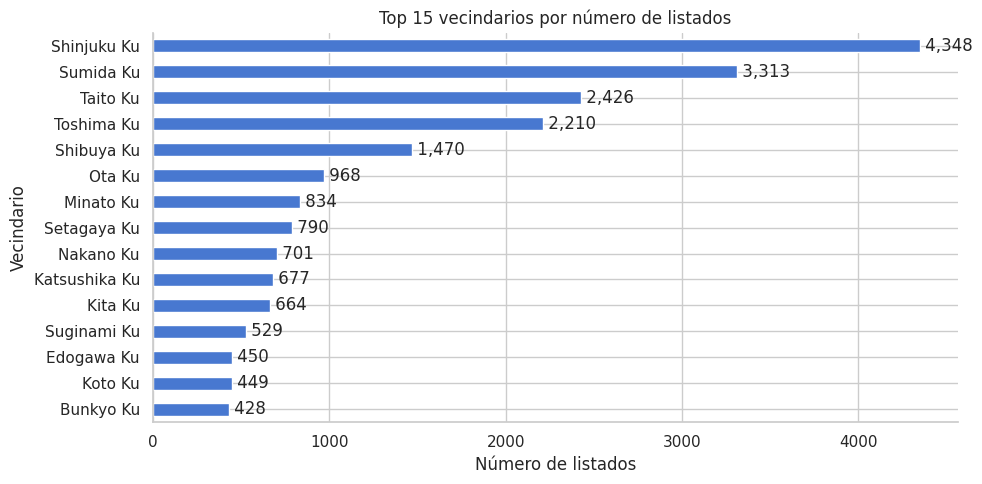

In [66]:
# ---------- 1) neighbourhood_cleansed ----------
vc_nei = df["neighbourhood_cleansed"].fillna("Desconocido").astype(str).value_counts().head(15).sort_values()
fig, ax = plt.subplots()
vc_nei.plot(kind="barh", ax=ax)
ax.set_title("Top 15 vecindarios por número de listados")
ax.set_xlabel("Número de listados")
ax.set_ylabel("Vecindario")
add_bar_labels(ax, is_horizontal=True)
plt.tight_layout()
plt.show()

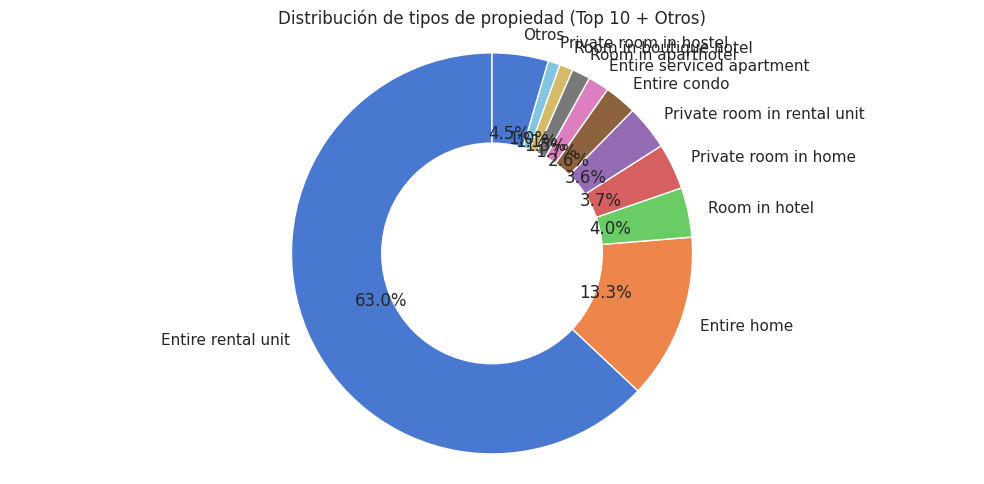

In [67]:
# ---------- 2) property_type (Top 10 + 'Otros') – Gráfico de dona ----------
vc_prop = top_k_with_others(df["property_type"], k=10)
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    vc_prop.values, labels=vc_prop.index, autopct="%1.1f%%", startangle=90
)
# dona
centre_circle = plt.Circle((0,0),0.55,fc="white")
fig.gca().add_artist(centre_circle)
ax.set_title("Distribución de tipos de propiedad (Top 10 + Otros)")
ax.axis("equal")
plt.tight_layout()
plt.show()

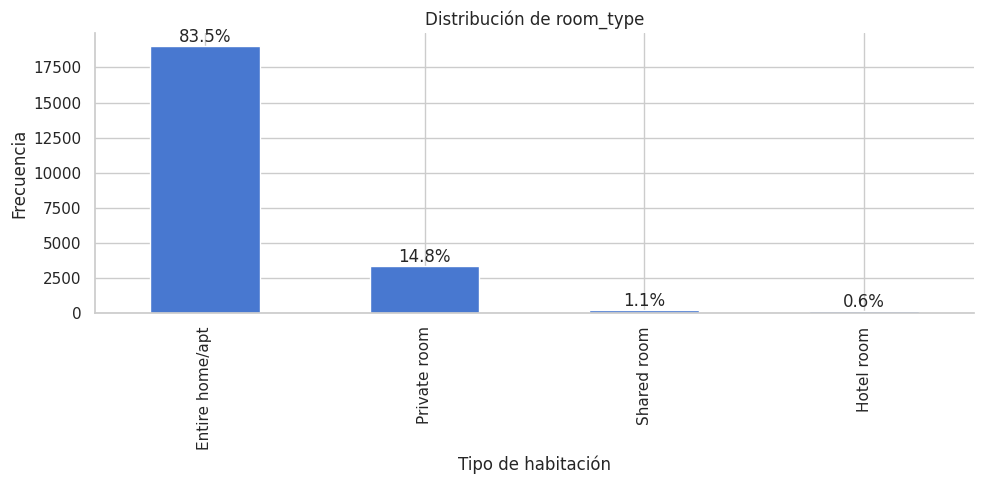

In [68]:
# ---------- 3) room_type – Barras verticales con porcentaje sobre cada barra ----------
vc_room = df["room_type"].fillna("Desconocido").astype(str).value_counts()
fig, ax = plt.subplots()
vc_room.plot(kind="bar", ax=ax)
ax.set_title("Distribución de room_type")
ax.set_xlabel("Tipo de habitación")
ax.set_ylabel("Frecuencia")
total = vc_room.sum()
for p in ax.patches:
    h = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, h, f"{h/total:.1%}", ha="center", va="bottom")
plt.tight_layout()
plt.show()

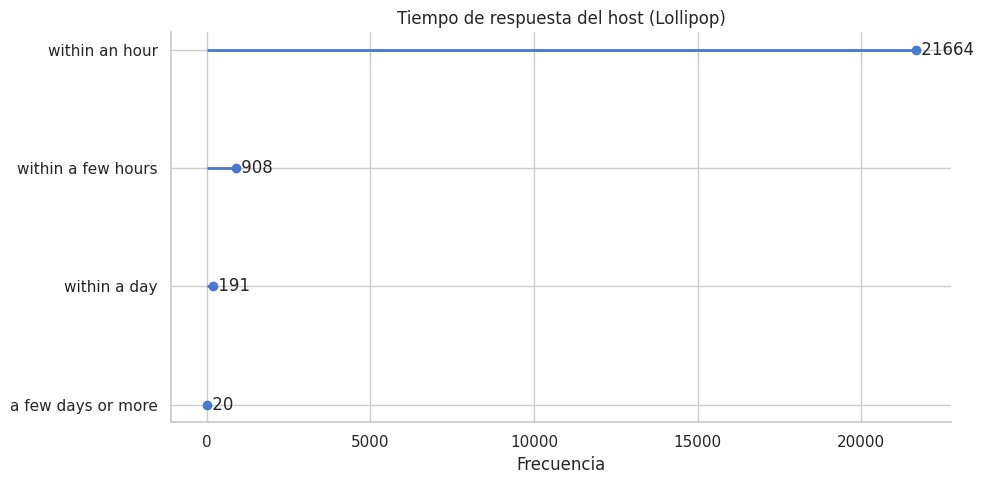

In [69]:
# ---------- 4) host_response_time – Lollipop chart (palitos y puntos) ----------
resp = df["host_response_time"].fillna("Desconocido").astype(str).value_counts().sort_values(ascending=True)
fig, ax = plt.subplots()
y = np.arange(len(resp))
ax.hlines(y, 0, resp.values, linewidth=2)
ax.plot(resp.values, y, "o")
ax.set_yticks(y)
ax.set_yticklabels(resp.index)
ax.set_xlabel("Frecuencia")
ax.set_title("Tiempo de respuesta del host (Lollipop)")
for i, v in enumerate(resp.values):
    ax.text(v, i, f" {v}", va="center")
plt.tight_layout()
plt.show()


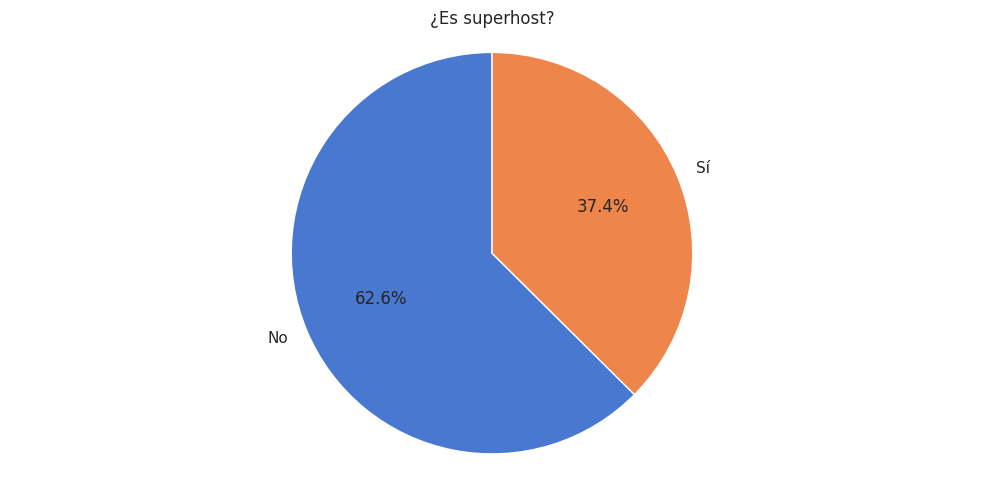

In [70]:
# ---------- 5) host_is_superhost – Pie simple ----------
vc_super = df["host_is_superhost"].fillna("Desconocido").astype(str).value_counts()
fig, ax = plt.subplots()
ax.pie(vc_super.values, labels=vc_super.index, autopct="%1.1f%%", startangle=90)
ax.set_title("¿Es superhost?")
ax.axis("equal")
plt.tight_layout()
plt.show()

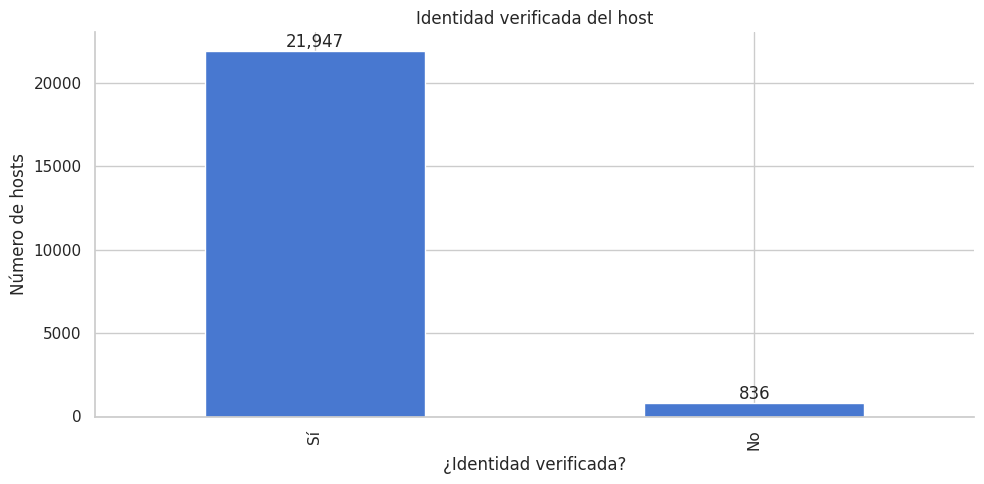

In [71]:
# ---------- 6) host_identity_verified – Barras con conteo y etiquetas ----------
vc_idv = df["host_identity_verified"].fillna("Desconocido").astype(str).value_counts()
fig, ax = plt.subplots()
vc_idv.plot(kind="bar", ax=ax)
ax.set_title("Identidad verificada del host")
ax.set_xlabel("¿Identidad verificada?")
ax.set_ylabel("Número de hosts")
add_bar_labels(ax)
plt.tight_layout()
plt.show()

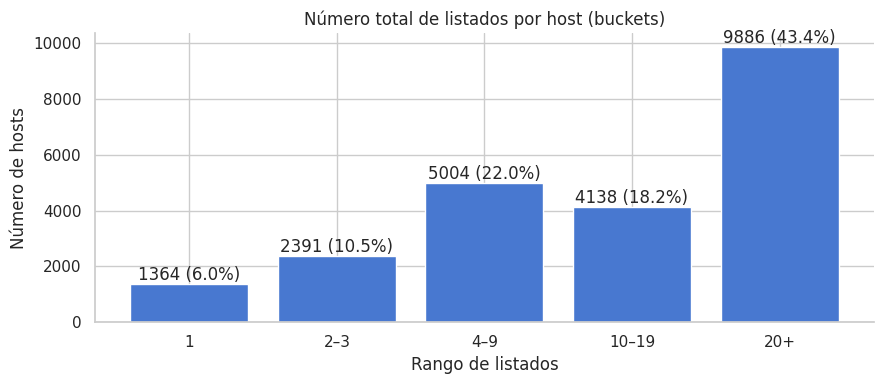

In [72]:
# ---------- 7) host_total_listings_count – Buckets (categoría derivada) ----------
counts = pd.to_numeric(df["host_total_listings_count"], errors="coerce")

bins = [-0.1, 1, 3, 9, 19, np.inf]
labels = ["1", "2–3", "4–9", "10–19", "20+"]
cat = pd.cut(counts, bins=bins, labels=labels)

vc = cat.value_counts().reindex(labels)
total = vc.sum()
pct = (vc / total * 100).round(1)

fig, ax = plt.subplots(figsize=(9,4))
bars = ax.bar(vc.index.astype(str), vc.values)

ax.set_title("Número total de listados por host (buckets)")
ax.set_xlabel("Rango de listados")
ax.set_ylabel("Número de hosts")

for rect, c, p in zip(bars, vc.values, pct.values):
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(),
            f"{int(c)} ({p}%)", ha="center", va="bottom")

plt.tight_layout()
plt.show()



/tmp/ipython-input-1020932471.py:13: UserWarning: Glyph 143 (\x8f) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1020932471.py:13: UserWarning: Glyph 157 (\x9d) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 143 (\x8f) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 157 (\x9d) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


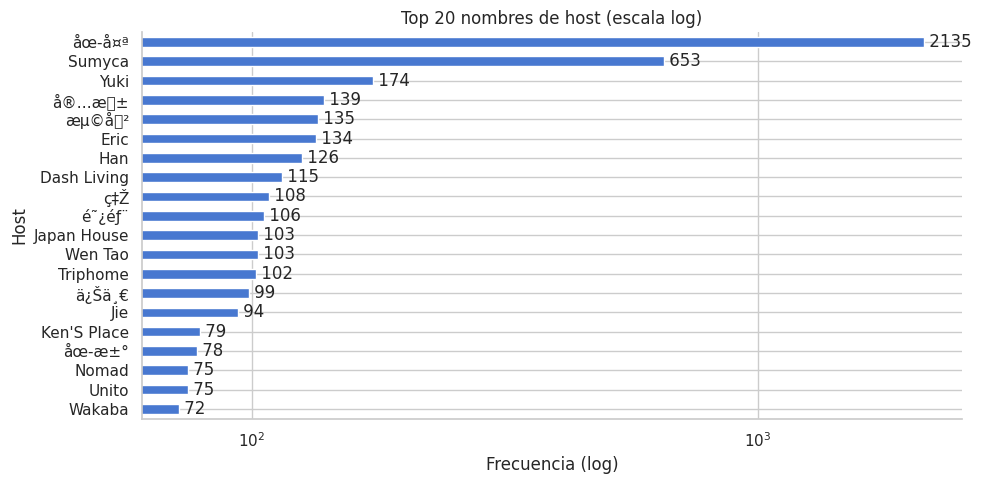

In [73]:

# ---------- 8) host_name (Top 20) ----------
vc_host = df["host_name"].fillna("Desconocido").astype(str).value_counts().head(20).sort_values()
fig, ax = plt.subplots()
vc_host.plot(kind="barh", ax=ax)
ax.set_xscale("log")
ax.set_title("Top 20 nombres de host (escala log)")
ax.set_xlabel("Frecuencia (log)")
ax.set_ylabel("Host")
for p in ax.patches:
    w = p.get_width()
    y = p.get_y() + p.get_height()/2
    ax.text(w, y, f" {int(w)}", va="center")
plt.tight_layout()
plt.show()

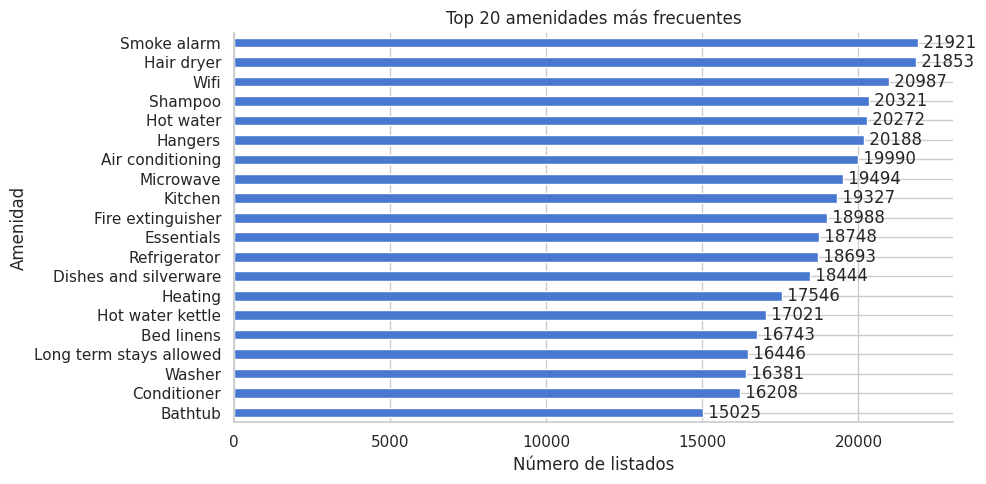

In [74]:
# ---------- 9) amenities – Top 20 amenidades individuales (categórico) ----------
import re

def split_amenities(x):
    if pd.isna(x):
        return []
    s = str(x).strip()
    # eliminar corchetes y comillas comunes
    s = re.sub(r'[\[\]\"]', '', s)
    parts = [a.strip() for a in s.split(",") if a.strip() != ""]
    return parts

amen_lists = df["amenities"].apply(split_amenities)

# aplanar y contar
amen_series = pd.Series([a for sub in amen_lists for a in sub])
top_amen = amen_series.value_counts().head(20).sort_values()  # Top 20 ordenado asc

fig, ax = plt.subplots()
top_amen.plot(kind="barh", ax=ax)
ax.set_title("Top 20 amenidades más frecuentes")
ax.set_xlabel("Número de listados")
ax.set_ylabel("Amenidad")

# etiquetas de valor
for p in ax.patches:
    w = p.get_width()
    y = p.get_y() + p.get_height()/2
    ax.text(w, y, f" {int(w)}", va="center")

plt.tight_layout()
plt.show()


/tmp/ipython-input-1894951521.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  first_review_dt = pd.to_datetime(df["first_review"], errors="coerce")


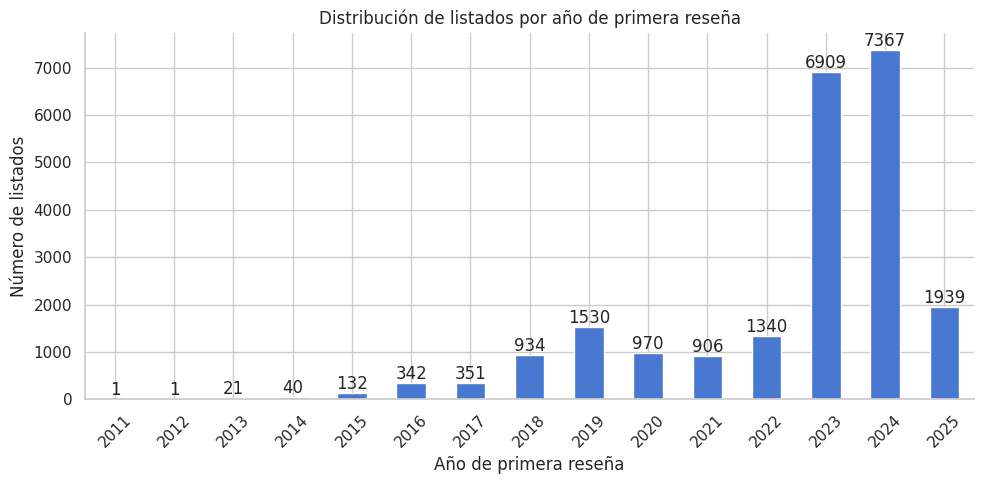

In [75]:
# ---------- 10) first_review (año) – Conteo por año (categórico) ----------
first_review_dt = pd.to_datetime(df["first_review"], errors="coerce")
first_year = first_review_dt.dt.year.dropna().astype(int).astype(str)

vc_first_year = first_year.value_counts().sort_index()  # categórico por año

fig, ax = plt.subplots()
vc_first_year.plot(kind="bar", ax=ax)
ax.set_title("Distribución de listados por año de primera reseña")
ax.set_xlabel("Año de primera reseña")
ax.set_ylabel("Número de listados")
for i, v in enumerate(vc_first_year.values):
    ax.text(i, v, f"{v}", ha="center", va="bottom")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [76]:
def sturges_tabla(serie, dec=2, closed="right"):
    """
    Aplica Sturges a una serie numérica y regresa una tabla ordenada con:
    intervalo (str), left, right, width, conteo, porcentaje, porcentaje_acum, k, n.
    """
    s = pd.to_numeric(pd.Series(serie), errors="coerce").dropna()
    n = len(s)
    if n == 0:
        raise ValueError("Serie sin datos numéricos válidos.")
    k = int(np.ceil(1 + np.log2(n)))
    # cortar con k bins
    cats = pd.cut(s, bins=k, include_lowest=True, right=(closed=="right"))
    freqs = cats.value_counts().sort_index()

    # construir tabla
    filas = []
    total = freqs.sum()
    for iv, cnt in freqs.items():
        left = round(iv.left, dec)
        right = round(iv.right, dec)
        width = round(iv.right - iv.left, dec)
        filas.append({
            "intervalo": f"{'[' if iv.closed_left else '('}{left}, {right}{']' if iv.closed_right else ')'}",
            "left": left,
            "right": right,
            "width": width,
            "conteo": int(cnt),
            "porcentaje": round(cnt/total*100, 2)
        })
    tabla = pd.DataFrame(filas)
    tabla["porcentaje_acum"] = tabla["porcentaje"].cumsum().round(2)
    tabla["k"] = k
    tabla["n"] = n
    return tabla

def proponer_agrupacion(tabla_sturges, min_pct=8.0, dec=2):
    """
    Fusiona intervalos adyacentes hasta que cada grupo tenga al menos min_pct (%).
    Devuelve una tabla con grupos propuestos: rango, conteo_total, pct_total, pct_acum.
    """
    t = tabla_sturges.copy().reset_index(drop=True)
    grupos = []
    g_left = t.loc[0, "left"]
    g_right = t.loc[0, "right"]
    g_cnt = 0
    g_pct = 0.0
    pct_acum = 0.0

    for i, row in t.iterrows():
        g_right = row["right"]
        g_cnt += row["conteo"]
        g_pct += row["porcentaje"]
        # si el grupo ya alcanza el mínimo o es el último intervalo, cerramos grupo
        if (g_pct >= min_pct) or (i == len(t)-1):
            grupos.append({
                "rango": f"[{round(g_left, dec)}, {round(g_right, dec)}]",
                "conteo_total": g_cnt,
                "pct_total": round(g_pct, 2)
            })
            pct_acum += g_pct
            # reiniciar acumuladores si no es el último
            if i < len(t)-1:
                g_left = t.loc[i+1, "left"]
                g_right = t.loc[i+1, "right"]
                g_cnt = 0
                g_pct = 0.0

    out = pd.DataFrame(grupos)
    out["pct_acum"] = out["pct_total"].cumsum().round(2)
    return out

def plot_frec(tabla_sturges, titulo=None, rot=45):
    """
    Barra simple de frecuencias por intervalo.
    """
    t = tabla_sturges.copy()
    xlabs = t["intervalo"].tolist()
    vals = t["conteo"].tolist()

    fig, ax = plt.subplots(figsize=(10,4))
    ax.bar(range(len(vals)), vals)
    ax.set_xticks(range(len(vals)))
    ax.set_xticklabels(xlabs, rotation=rot, ha="right")
    ax.set_xlabel("Intervalos")
    ax.set_ylabel("Frecuencia")
    if titulo:
        ax.set_title(titulo)
    for i, v in enumerate(vals):
        ax.text(i, v, str(int(v)), ha="center", va="bottom")
    plt.tight_layout()
    plt.show()


In [77]:
def sturges_batch(
    df,
    cols,
    dec=2,
    min_pct=8.0,
    closed="right",
    rename_map=None,
    drop_empty=True
):
    """
    Aplica Sturges y propuesta de agrupación a una lista de columnas numéricas.
    - cols: nombres solicitados (pueden no existir en df).
    - rename_map: dict opcional para mapear col -> col_real_en_df.
    Devuelve:
      results_dict[col] = {"tabla": tabla_sturges, "propuesta": propuesta}
      df_tablas (todas las tablas unidas)
      df_propuestas (todas las propuestas unidas)
    """
    if rename_map is None:
        rename_map = {}

    results = {}
    tablas = []
    props = []

    for col in cols:
        col_df = rename_map.get(col, col)
        if col_df not in df.columns:
            if not drop_empty:
                results[col] = {"tabla": None, "propuesta": None}
            continue

        try:
            t = sturges_tabla(df[col_df], dec=dec, closed=closed)
            p = proponer_agrupacion(t, min_pct=min_pct, dec=dec)

            results[col] = {"tabla": t, "propuesta": p}

            tt = t.copy()
            tt.insert(0, "variable", col)
            tt.insert(1, "col_df", col_df)
            tablas.append(tt)

            pp = p.copy()
            pp.insert(0, "variable", col)
            pp.insert(1, "col_df", col_df)
            props.append(pp)

        except ValueError:
            if not drop_empty:
                results[col] = {"tabla": None, "propuesta": None}
            continue

    df_tablas = pd.concat(tablas, ignore_index=True) if tablas else pd.DataFrame()
    df_propuestas = pd.concat(props, ignore_index=True) if props else pd.DataFrame()
    return results, df_tablas, df_propuestas


In [78]:
# Lista final de 10 variables (sin bathrooms ni maximum_nights)
cols_profesor = [
    "host_response_rate",
    "host_acceptance_rate",
    "host_total_listings_count",
    "accommodates",
    "beds",
    "price",
    "availability_365",
    "number_of_reviews",
    "review_scores_value",
    "reviews_per_month"
]

# Si quieres incluir dos adicionales para enriquecer (opcional):
cols_extra = [
    "availability_90",
    "estimated_revenue_l365d"
]

# Ejecuta el batch con las funciones previas
results_dict, tablas_consolidadas, propuestas_consolidadas = sturges_batch(
    df,
    cols_profesor + cols_extra,
    dec=2,
    min_pct=8.0,
    closed="right",
    rename_map={},
    drop_empty=True
)



In [79]:
# --- Generar todas las tablas con las 10 variables ---
cols_profesor = [
    "host_response_rate",
    "host_acceptance_rate",
    "host_total_listings_count",
    "accommodates",
    "beds",
    "price",
    "availability_365",
    "number_of_reviews",
    "review_scores_value",
    "reviews_per_month"
]

# Ejecutamos batch
results_dict, tablas_consolidadas, propuestas_consolidadas = sturges_batch(
    df,
    cols_profesor,
    dec=2,
    min_pct=8.0,
    closed="right",
    rename_map={},
    drop_empty=True
)

# --- Mostrar en pantalla todas las tablas ---
for col in cols_profesor:
    print(f"\n============================")
    print(f"Variable: {col}")
    print("============================\n")

    print("Tabla Sturges:")
    print(results_dict[col]["tabla"])
    print("\nPropuesta de agrupación:")
    print(results_dict[col]["propuesta"])
    print("\n\n")

# --- Opcional: ver consolidados ---
print("TABLAS CONSOLIDADAS:")
print(tablas_consolidadas.head(20))   # puedes quitar head() para ver todo

print("\nPROPUESTAS CONSOLIDADAS:")
print(propuestas_consolidadas.head(20))



Variable: host_response_rate

Tabla Sturges:
       intervalo  left  right  width  conteo  porcentaje  porcentaje_acum   k  \
0   (0.88, 0.89]  0.88   0.89   0.01      52        0.23             0.23  16   
1    (0.89, 0.9]  0.89   0.90   0.01      15        0.07             0.30  16   
2     (0.9, 0.9]  0.90   0.90   0.01     196        0.86             1.16  16   
3    (0.9, 0.91]  0.90   0.91   0.01      34        0.15             1.31  16   
4   (0.91, 0.92]  0.91   0.92   0.01       0        0.00             1.31  16   
5   (0.92, 0.92]  0.92   0.92   0.01      35        0.15             1.46  16   
6   (0.92, 0.93]  0.92   0.93   0.01      16        0.07             1.53  16   
7   (0.93, 0.94]  0.93   0.94   0.01     185        0.81             2.34  16   
8   (0.94, 0.95]  0.94   0.95   0.01       0        0.00             2.34  16   
9   (0.95, 0.96]  0.95   0.96   0.01     151        0.66             3.00  16   
10  (0.96, 0.96]  0.96   0.96   0.01     161        0.71       

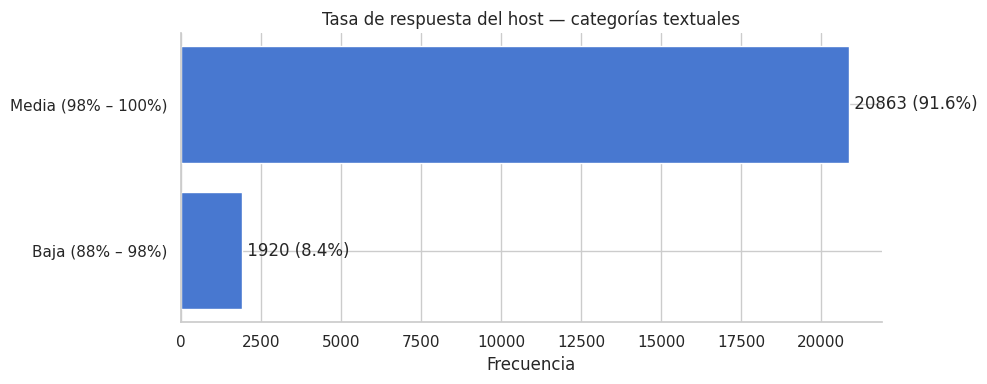

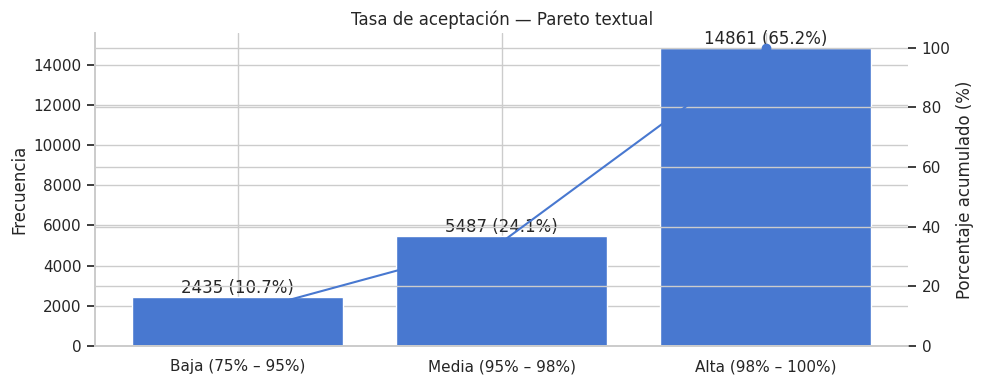

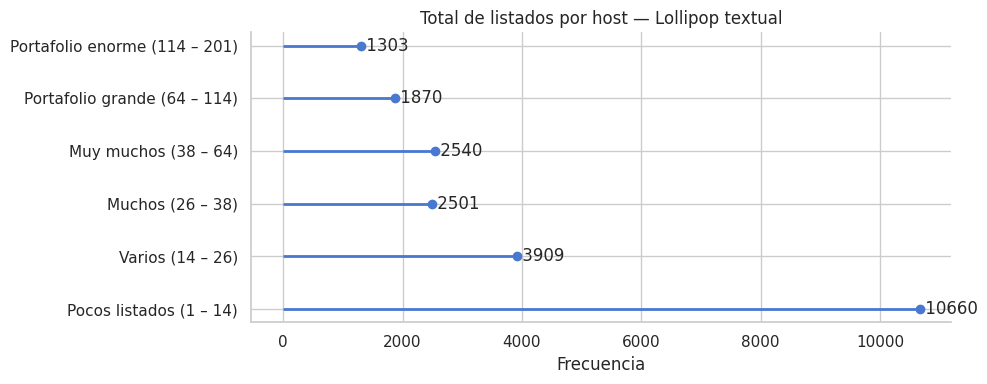

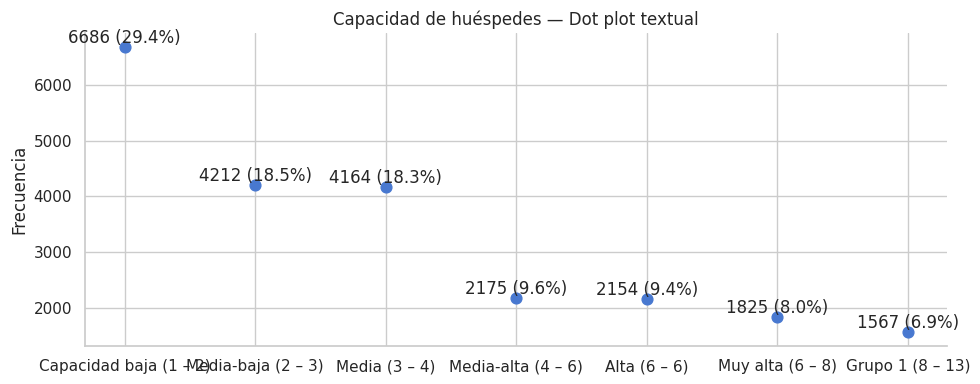

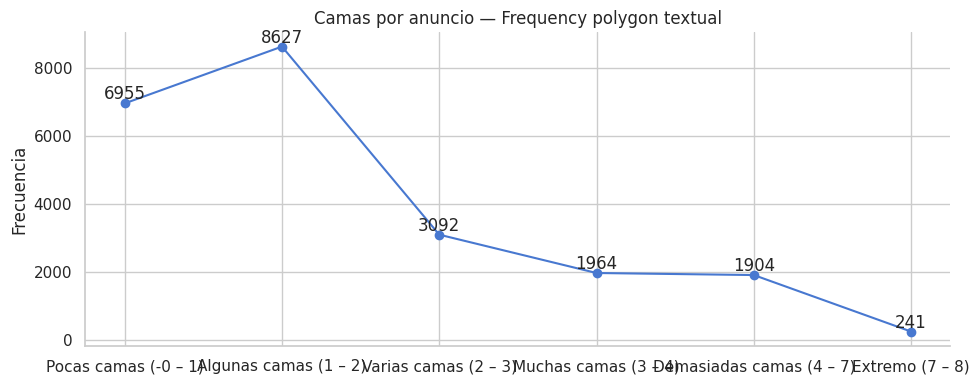

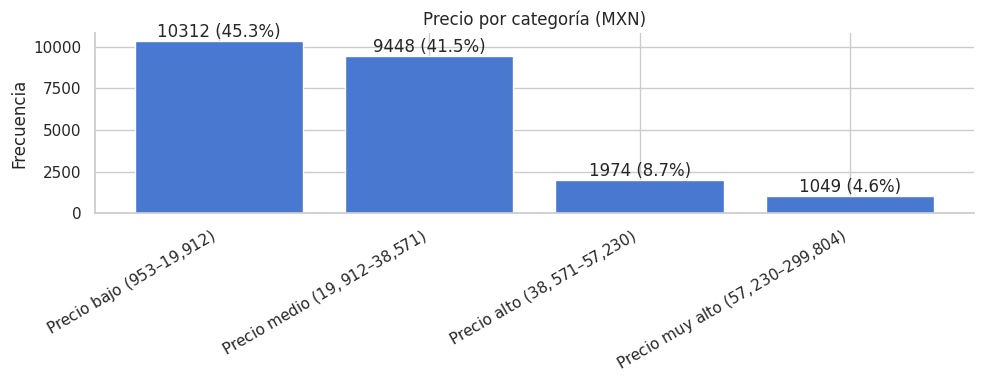

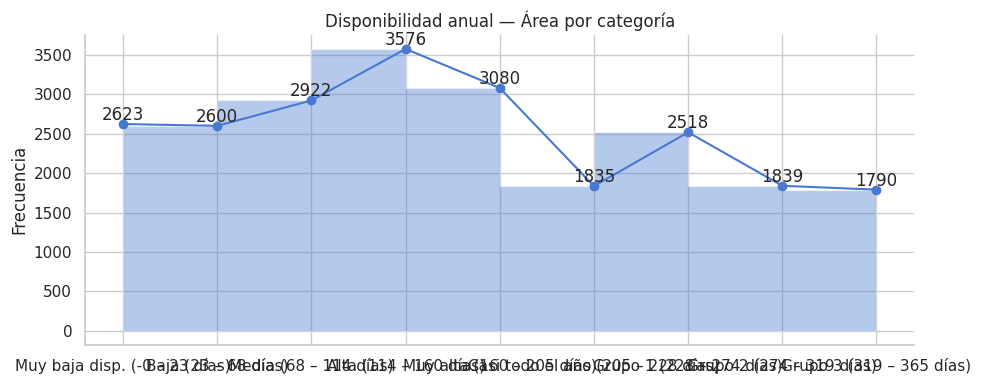

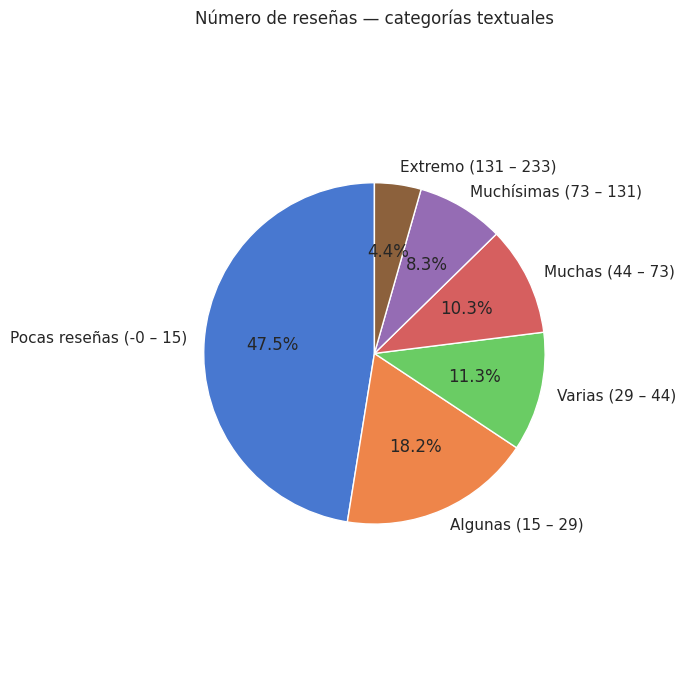

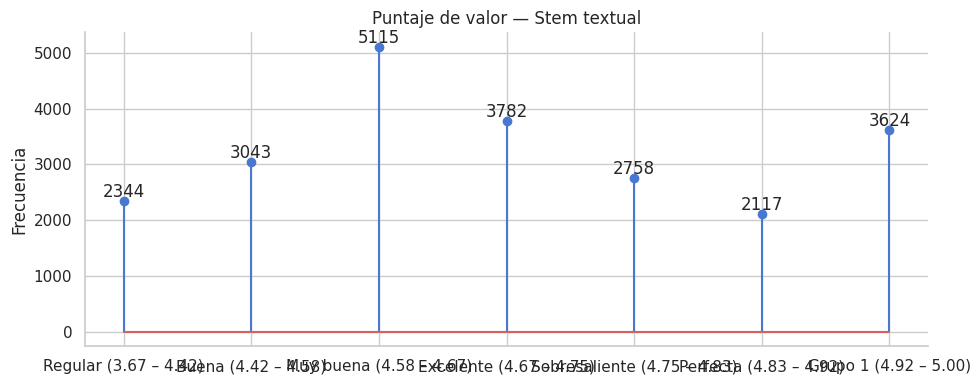

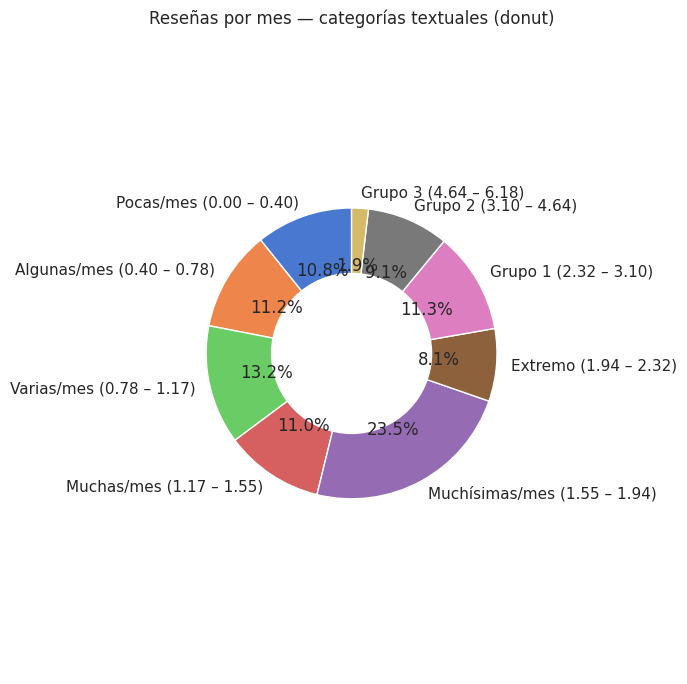

In [82]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ================== Helpers base ==================
def parse_rango(rango_str):
    nums = re.findall(r"[-+]?\d*\.?\d+", str(rango_str))
    if len(nums) >= 2:
        a, b = float(nums[0]), float(nums[1])
        return a, b
    return None, None

def fmt_th(x, dec=0):
    return f"{x:,.{dec}f}"

def midpoints(rangos):
    mids = []
    for r in rangos:
        a, b = parse_rango(r)
        mids.append((a+b)/2 if a is not None else np.nan)
    return np.array(mids)

def _fmt_range(a, b, *, as_percent=False, currency=False, unit=None, dec=0):
    if a is None: return ""
    if as_percent:  return f"{a*100:.0f}% – {b*100:.0f}%"
    if currency:    return f"${fmt_th(a,0)} – ${fmt_th(b,0)}"
    base = f"{fmt_th(a,dec)} – {fmt_th(b,dec)}"
    return base + (f" {unit}" if unit else "")

# Reglas de formato por variable
VAR_RULES = {
    "host_response_rate":   {"as_percent": True,  "currency": False, "unit": None,  "dec": 0},
    "host_acceptance_rate": {"as_percent": True,  "currency": False, "unit": None,  "dec": 0},
    "host_total_listings_count": {"as_percent": False, "currency": False, "unit": None, "dec": 0},
    "accommodates":         {"as_percent": False, "currency": False, "unit": None,  "dec": 0},
    "beds":                 {"as_percent": False, "currency": False, "unit": None,  "dec": 0},
    "price":                {"as_percent": False, "currency": True,  "unit": None,  "dec": 0},
    "availability_365":     {"as_percent": False, "currency": False, "unit": "días","dec": 0},
    "number_of_reviews":    {"as_percent": False, "currency": False, "unit": None,  "dec": 0},
    "review_scores_value":  {"as_percent": False, "currency": False, "unit": None,  "dec": 2},
    "reviews_per_month":    {"as_percent": False, "currency": False, "unit": None,  "dec": 2},
}

# Nombres cualitativos base por variable (se asignan en orden a cada rango)
QUAL_MAPS = {
    "host_response_rate":   ["Baja", "Media", "Alta", "Muy alta", "Casi total", "Total"],
    "host_acceptance_rate": ["Baja", "Media", "Alta", "Muy alta", "Casi total", "Total"],
    "host_total_listings_count": ["Pocos listados", "Varios", "Muchos", "Muy muchos", "Portafolio grande", "Portafolio enorme"],
    "accommodates":         ["Capacidad baja", "Media-baja", "Media", "Media-alta", "Alta", "Muy alta"],
    "beds":                 ["Pocas camas", "Algunas camas", "Varias camas", "Muchas camas", "Demasiadas camas", "Extremo"],
    "price":                ["Precio bajo", "Precio medio", "Precio alto", "Precio muy alto", "Precio extremo"],
    "availability_365":     ["Muy baja disp.", "Baja", "Media", "Alta", "Muy alta", "Casi todo el año"],
    "number_of_reviews":    ["Pocas reseñas", "Algunas", "Varias", "Muchas", "Muchísimas", "Extremo"],
    "review_scores_value":  ["Regular", "Buena", "Muy buena", "Excelente", "Sobresaliente", "Perfecta"],
    "reviews_per_month":    ["Pocas/mes", "Algunas/mes", "Varias/mes", "Muchas/mes", "Muchísimas/mes", "Extremo"],
}

def etiquetas_textuales(variable, propuesta_df):
    rules = VAR_RULES.get(variable, {"as_percent": False, "currency": False, "unit": None, "dec": 0})
    rangos = propuesta_df["rango"].tolist()
    k = len(rangos)
    base = QUAL_MAPS.get(variable, [])
    if len(base) < k:
        base = base + [f"Grupo {i}" for i in range(1, k-len(base)+1)]
    etiquetas = []
    for i, r in enumerate(rangos):
        a, b = parse_rango(r)
        rango_fmt = _fmt_range(a, b, **rules)
        etiquetas.append(f"{base[i]} ({rango_fmt})")
    return etiquetas

# ================== 10 GRÁFICOS (cada uno distinto) ==================

# 1) Barras horizontales
def plot_host_response_rate():
    p = results_dict["host_response_rate"]["propuesta"].copy()
    labels = etiquetas_textuales("host_response_rate", p)
    vals = p["conteo_total"].values; pct = p["pct_total"].values
    fig, ax = plt.subplots(figsize=(10,4))
    y = np.arange(len(vals))
    ax.barh(y, vals)
    ax.set_yticks(y); ax.set_yticklabels(labels)
    ax.set_title("Tasa de respuesta del host — categorías textuales")
    ax.set_xlabel("Frecuencia")
    for i, v in enumerate(vals): ax.text(v, i, f" {int(v)} ({pct[i]:.1f}%)", va="center")
    plt.tight_layout(); plt.show()

# 2) Pareto (barras + acumulada)
def plot_host_acceptance_rate():
    p = results_dict["host_acceptance_rate"]["propuesta"].copy()
    labels = etiquetas_textuales("host_acceptance_rate", p)
    vals = p["conteo_total"].values; pct = p["pct_total"].values; cum = p["pct_acum"].values
    fig, ax1 = plt.subplots(figsize=(10,4))
    bars = ax1.bar(range(len(vals)), vals)
    ax1.set_xticks(range(len(vals))); ax1.set_xticklabels(labels)
    ax1.set_ylabel("Frecuencia"); ax1.set_title("Tasa de aceptación — Pareto textual")
    for i, r in enumerate(bars):
        ax1.text(r.get_x()+r.get_width()/2, r.get_height(), f"{int(vals[i])} ({pct[i]:.1f}%)",
                 ha="center", va="bottom")
    ax2 = ax1.twinx(); ax2.plot(range(len(vals)), cum, marker="o")
    ax2.set_ylabel("Porcentaje acumulado (%)"); ax2.set_ylim(0,105)
    plt.tight_layout(); plt.show()

# 3) Lollipop
def plot_host_total_listings_count():
    p = results_dict["host_total_listings_count"]["propuesta"].copy()
    labels = etiquetas_textuales("host_total_listings_count", p)
    vals = p["conteo_total"].values; y = np.arange(len(vals))
    fig, ax = plt.subplots(figsize=(10,4))
    ax.hlines(y, 0, vals, linewidth=2); ax.plot(vals, y, "o")
    ax.set_yticks(y); ax.set_yticklabels(labels)
    ax.set_title("Total de listados por host — Lollipop textual")
    ax.set_xlabel("Frecuencia")
    for i, v in enumerate(vals): ax.text(v, i, f" {int(v)}", va="center")
    plt.tight_layout(); plt.show()

# 4) Dot plot
def plot_accommodates():
    p = results_dict["accommodates"]["propuesta"].copy()
    labels = etiquetas_textuales("accommodates", p)
    vals = p["conteo_total"].values; x = np.arange(len(vals))
    fig, ax = plt.subplots(figsize=(10,4))
    ax.scatter(x, vals, s=60)
    ax.set_xticks(x); ax.set_xticklabels(labels)
    ax.set_ylabel("Frecuencia"); ax.set_title("Capacidad de huéspedes — Dot plot textual")
    for i, v in enumerate(vals): ax.text(x[i], v, f"{int(v)} ({p['pct_total'].values[i]:.1f}%)", ha="center", va="bottom")
    plt.tight_layout(); plt.show()

# 5) Frequency polygon (sobre índices)
def plot_beds():
    p = results_dict["beds"]["propuesta"].copy()
    labels = etiquetas_textuales("beds", p)
    vals = p["conteo_total"].values; x = np.arange(len(vals))
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(x, vals, marker="o")
    ax.set_xticks(x); ax.set_xticklabels(labels)
    ax.set_ylabel("Frecuencia"); ax.set_title("Camas por anuncio — Frequency polygon textual")
    for i, v in enumerate(vals): ax.text(x[i], v, str(int(v)), ha="center", va="bottom")
    plt.tight_layout(); plt.show()

# 6) Barras verticales (precio MXN)
def plot_price():
    p = results_dict["price"]["propuesta"].copy()
    labels = etiquetas_textuales("price", p)
    vals = p["conteo_total"].values; pct = p["pct_total"].values
    fig, ax = plt.subplots(figsize=(10,4))
    bars = ax.bar(range(len(vals)), vals)
    ax.set_xticks(range(len(vals))); ax.set_xticklabels(labels, rotation=30, ha="right")
    ax.set_ylabel("Frecuencia"); ax.set_title("Precio por categoría (MXN)")
    for i, r in enumerate(bars): ax.text(r.get_x()+r.get_width()/2, r.get_height(), f"{int(vals[i])} ({pct[i]:.1f}%)", ha="center", va="bottom")
    plt.tight_layout(); plt.show()

# 7) Área (categorías por índice)
def plot_availability_365():
    p = results_dict["availability_365"]["propuesta"].copy()
    labels = etiquetas_textuales("availability_365", p)
    vals = p["conteo_total"].values; x = np.arange(len(vals))
    fig, ax = plt.subplots(figsize=(10,4))
    ax.fill_between(x, vals, step="pre", alpha=0.4)
    ax.plot(x, vals, marker="o")
    ax.set_xticks(x); ax.set_xticklabels(labels)
    ax.set_ylabel("Frecuencia"); ax.set_title("Disponibilidad anual — Área por categoría")
    for i, v in enumerate(vals): ax.text(x[i], v, str(int(v)), ha="center", va="bottom")
    plt.tight_layout(); plt.show()

# 8) Pie textual
def plot_number_of_reviews():
    p = results_dict["number_of_reviews"]["propuesta"].copy()
    labels = etiquetas_textuales("number_of_reviews", p)
    vals = p["conteo_total"].values
    fig, ax = plt.subplots(figsize=(7,7))
    ax.pie(vals, labels=labels, autopct="%1.1f%%", startangle=90)
    ax.set_title("Número de reseñas — categorías textuales")
    ax.axis("equal"); plt.tight_layout(); plt.show()

# 9) Stem (tallos) textual
def plot_review_scores_value():
    p = results_dict["review_scores_value"]["propuesta"].copy()
    labels = etiquetas_textuales("review_scores_value", p)
    vals = p["conteo_total"].values; x = np.arange(len(vals))
    fig, ax = plt.subplots(figsize=(10,4))
    markerline, stemlines, baseline = ax.stem(x, vals)
    ax.set_xticks(x); ax.set_xticklabels(labels)
    ax.set_ylabel("Frecuencia"); ax.set_title("Puntaje de valor — Stem textual")
    for i, v in enumerate(vals): ax.text(x[i], v, str(int(v)), ha="center", va="bottom")
    plt.tight_layout(); plt.show()

# 10) Donut textual
def plot_reviews_per_month():
    p = results_dict["reviews_per_month"]["propuesta"].copy()
    labels = etiquetas_textuales("reviews_per_month", p)
    vals = p["conteo_total"].values
    fig, ax = plt.subplots(figsize=(7,7))
    wedges, texts, autotexts = ax.pie(vals, labels=labels, autopct="%1.1f%%", startangle=90)
    centre_circle = plt.Circle((0,0), 0.55, fc="white")  # donut
    fig.gca().add_artist(centre_circle)
    ax.set_title("Reseñas por mes — categorías textuales (donut)")
    ax.axis("equal"); plt.tight_layout(); plt.show()

# ================== LLAMADAS (esto sí imprime) ==================
plot_host_response_rate()        # 1
plot_host_acceptance_rate()      # 2
plot_host_total_listings_count() # 3
plot_accommodates()              # 4
plot_beds()                      # 5
plot_price()                     # 6
plot_availability_365()          # 7
plot_number_of_reviews()         # 8
plot_review_scores_value()       # 9
plot_reviews_per_month()         # 10
